<h2><center>Applied Machine Learning - Assignment 6</center></h2>
<h4><center>Lorenzo Cirac Monteagduo</center></h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3>Data Preprocessing</h3>
<ol>
    <li>Generate a Sample dataset called $D_1$:</li>
    <ol Type="a">
        <li>Initialize a matrix $x \in \mathbb{R}^{100 \times 1}$ using normal distribution with $\mu = 1$ and $\sigma = 0.05$</li>
        <li>Generate target $y \in \mathbb{R}^{100 \times 1}$ using $y = 1.3x^2 + 4.8x + 8 + \psi$, where $\psi \in \mathbb{R}^{100 \times 1}$ is randomly initialized.</li>
    </ol>
    <li>Wine Quality dataset called $D_2$: (use winequality-red.csv) Wine Quality Dataset</li>
</ol>
<p>You are required to pre-process the given datasets.</p>

<h4>$D_1$</h4>

In [2]:
x = np.random.normal(loc = 1, scale = 0.05, size = (100, 1))

<p>Since the task does not specify a method for calculating noise ($\psi$), I will implement a $\psi$ - function that uses a mean of 0 and a standard deviation of 0.5, drawing noise values from a normal distribution.</p>

In [3]:
def psi(mean = 0, std = 0.5, size = (100, 1)):
    return np.random.normal(loc = mean, scale = std, size = size)

In [4]:
y = 1.3 * x**2 + 4.8 * x + 8 + psi()

<p>Finally, we get our D_1 data:</p>

In [5]:
D_1 = pd.DataFrame(np.hstack((x, y)), columns = ['x', 'y'])

<h4>$D_2$</h4>

<p>Since the D_2 dataset is imported from a CSV file, we will use Pandas for this task. Additionally, we will convert all values to floats. According to the dataset description, it does not contain any missing values.</p>

In [6]:
D_2 = pd.read_csv('res/winequality-red.csv', sep = ';').astype(float)

<h3>Question 1 - Generalized Linear Models</h3>
<p>In previous labs, you have implemented various optimization algorithms to solve linear or logistic
regression problems. In this task, you are required to use Scikit-Learn to experiment with the
following linear models and Stochastic Gradient Descent (SGD) [Hint: use SGDRegressor]:
</p>
<ul>
    <li>Ordinary Least Squares</li>
    <li>Ridge Regression</li>
    <li>LASSO</li>
</ul>
<h4>Tasks</h4>
<ol>
    <li>Split your data into Train and Test Splits. Use dataset D2.
</li>
    <li> For each model, pick three sets of hyperparameters and learn each model (without crossvalidation). Measure Train and Test RMSE and plot it on one plot. Explain the plots
and relate them to the influence of regularized vs. non-regularized models. You have to
compare the models and explain underfitting and overfitting.
</li>
    <li>Tune the hyperparameters using GridSearchCV and plot the results of cross-validation for
each model. [Hint: use cv results to see different options].
</li>
    <li>Using the optimal hyperparameter, evaluate each model using cross val score. Plot each
model using a boxplot and explain the significance of your results.</li>
</ol>

<h4>Task 1.1</h4>

In [7]:
from sklearn.model_selection import train_test_split
# https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.preprocessing import StandardScaler
# https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html

<p>According to the description of the wine quality dataset, our goal is to predict the quality of the wine.</p>

In [8]:
X = D_2.drop('quality', axis = 1).to_numpy()
y = D_2['quality'].to_numpy()

<p>We will use the train_test_split function to divide our data into 80% training and 20% testing sets.</p>

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

<p>Finally, we will standardize our data to ensure optimal performance with regularization models.</p>

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h4>Task 1.2</h4>

In [11]:
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso
from sklearn.metrics import root_mean_squared_error

<p>I decided to create a function that trains the model and calculates the RMSE for both the training and test sets. This will simplify the process of comparing all the models in a final plot.</p>

In [12]:
def evaluate_model(model, model_name, hyperparameter):
    model.fit(X_train, y_train)
    
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    RMSE_train = root_mean_squared_error(y_train, train_predictions)
    RMSE_test = root_mean_squared_error(y_test, test_predictions)

    results = {
        'model': model_name,
        'hyperparameter': hyperparameter,
        'RMSE_train': RMSE_train,
        'RMSE_test': RMSE_test
    }
    
    return results

<h4>Stochastic Gradient Descent</h4>
<p>For SGD, we will compare the hyperparameters using a fixed learning rate. I have decided to choose the values 0.1, 0.01, 0.001, and 0.0001.</p>

In [13]:
# https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.SGDRegressor.html
sgd_results = []

sgd_models = [
    SGDRegressor(learning_rate = 'constant', eta0 = 0.01),
    SGDRegressor(learning_rate = 'constant', eta0 = 0.001),
    SGDRegressor(learning_rate = 'constant', eta0 = 0.0001)
]

for model in sgd_models:
    sgd_results.append(evaluate_model(model, 'Stochastic Gradient Descent', f'eta_0 = {model.eta0}'))

<h4>Ordinary Least Squares</h4>
<p>Since Ordinary Least Squares does not have hyperparameters like learning rates or regularization, I decided to compare only this model with the others.</p>

In [14]:
# https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html
ols_model = LinearRegression()
ols_results = [evaluate_model(ols_model, 'Ordinary Least Squares', 'None')]

<h4>Ridge Regression</h4>
<p>For Ridge Regression, I decided to compare the regularization using the parameters 0.1, 1, and 10.</p>

In [15]:
# https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Ridge.html
ridge_results = []

ridge_models = [
    Ridge(alpha = 0.1),
    Ridge(alpha = 1),
    Ridge(alpha = 10)
]

for model in ridge_models:
    ridge_results.append(evaluate_model(model, 'Ridge Regression', f'alpha = {model.alpha}'))

<h5>LASSO</h5>
<p>For LASSO, I decided to compare the regularization using the parameters 0.01, 0.1, and 1.</p>

In [16]:
# https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Lasso.html
lasso_results = []

lasso_models = [
    Lasso(alpha = 0.01),
    Lasso(alpha = 0.1),
    Lasso(alpha = 1)
]

for model in lasso_models:
    lasso_results.append(evaluate_model(model, 'LASSO', f'alpha = {model.alpha}'))

<h4>Comparison of RMSE on training and test data across models</h4>
<p>Finally, we can compare the models by plotting the training and test RMSE for each model on a single plot.</p>

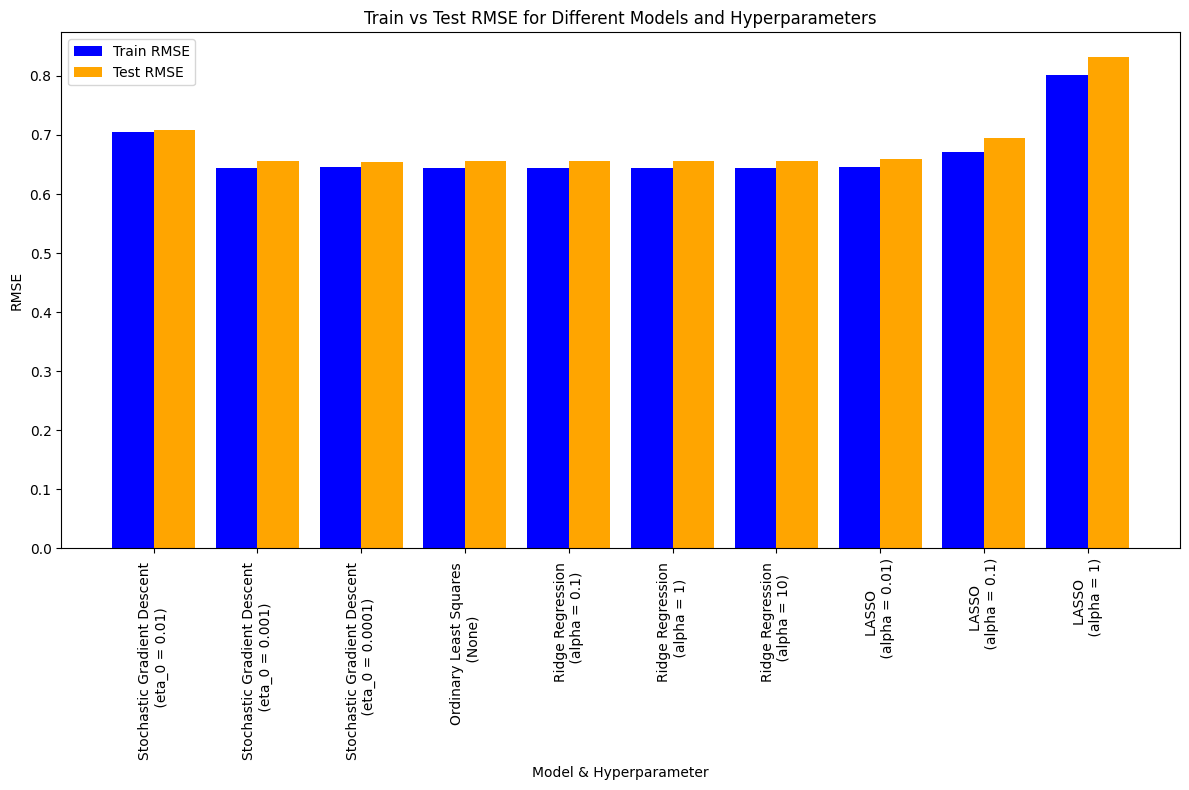

In [17]:
all_results = sgd_results + ols_results + ridge_results + lasso_results

model_names = []
hyperparameters = []
RMSE_train = []
RMSE_test = []

for result in all_results:
    model_names.append(result['model'])
    hyperparameters.append(result['hyperparameter'])
    RMSE_train.append(result['RMSE_train'])
    RMSE_test.append(result['RMSE_test'])

fig, ax = plt.subplots(figsize = (12,8))
x_pos = np.arange(len(model_names))

ax.bar(x_pos - 0.2, RMSE_train, width = 0.4, label = 'Train RMSE', color = 'blue')
ax.bar(x_pos + 0.2, RMSE_test, width = 0.4, label = 'Test RMSE', color = 'orange')
ax.set_xticks(x_pos)
ax.set_xticklabels([f'{name} \n ({param})' for name, param in zip(model_names, hyperparameters)], rotation = 90)
ax.set_title('Train vs Test RMSE for Different Models and Hyperparameters')
ax.set_xlabel('Model & Hyperparameter')
ax.set_ylabel('RMSE')
ax.legend()

plt.tight_layout()
plt.show()

<p>Underfitting: The model is not complex enough to explain the data
well.This results in poor predictive performance.</p>
<p>Overfitting: The model is too complex, it describes the noise instead of
the underlying relationship between the variables. Similarly to underfitting,
this results in poor predictive performance.</p>

<ul>
    <li>All the models perform similarly well, as they all use Ordinary Least Squares (OLS) as the minimization function.</li>
    <li>The Lasso model performs worse as the regularization parameter increases. This is likely due to the stronger penalty, which can lead to an over-penalization of the coefficients, causing underfitting.</li>
    <li>As expected, the test RMSE is slightly worse than the train RMSE, indicating some degree of overfitting to the training data.</li>
    <li>The SGD model with a larger learning rate (0.01) performs slightly worse than those with smaller learning rates, likely due to instability in the optimization process.</li>
</ul>

<p>sources: https://www.ismll.uni-hildesheim.de/lehre/ml-15w/script/ml-04-A3-regularization.pdf</p>

<h4>Task 1.3</h4>

In [18]:
from sklearn.model_selection import GridSearchCV

<p>For this task, we will again utilize a function to perform hyperparameter tuning using GridSearchCV and visualize our results. We will set the scoring parameter in GridSearchCV to 'neg_root_mean_squared_error', meaning that RMSE will be used as the evaluation metric for assessing the performance of the cross-validated model on the test set (https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.GridSearchCV.html). By examining the cv_results_ attribute, we can retrieve the mean test scores and mean fit times (We will multiply the mean fit time by 100 so that we can see the bars on the plot). We will plot these values for each hyperparameter to assess both model performance and convergence time. In the end, we will return the best parameter for the next task.</p>

In [19]:
def grid_search_and_plot(model, model_param_grid):
    model_grid_search = GridSearchCV(model, model_param_grid, scoring = 'neg_root_mean_squared_error')
    model_grid_search.fit(X_train, y_train)

    param_name = list(model_param_grid.keys())[0]

    model_grid_search_results = pd.DataFrame.from_dict(model_grid_search.cv_results_)
    model_results = model_grid_search_results[[f'param_{param_name}', 'mean_test_score', 'mean_fit_time']]
    model_results.loc[:, 'mean_test_score'] = model_results['mean_test_score'] * -1

    fig, ax = plt.subplots(figsize = (12,8))
    x_pos = np.arange(len(model_results))

    ax.bar(x_pos - 0.2, model_results['mean_test_score'], width = 0.4, label = 'Mean Test Score', color = 'blue')
    ax.bar(x_pos + 0.2, model_results['mean_fit_time'] * 100, width = 0.4, label = 'Mean Fit Time', color = 'green')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(model_results[f'param_{param_name}'], rotation = 90)
    ax.set_xlabel('Model & Hyperparameter')
    ax.set_ylabel('Mean test score & fit time')
    ax.legend()
    
    plt.tight_layout()
    plt.show()

    return model_grid_search.best_params_[param_name]

<h4>Hyperparameter tuning for Stochastic Gradient Descent</h4>

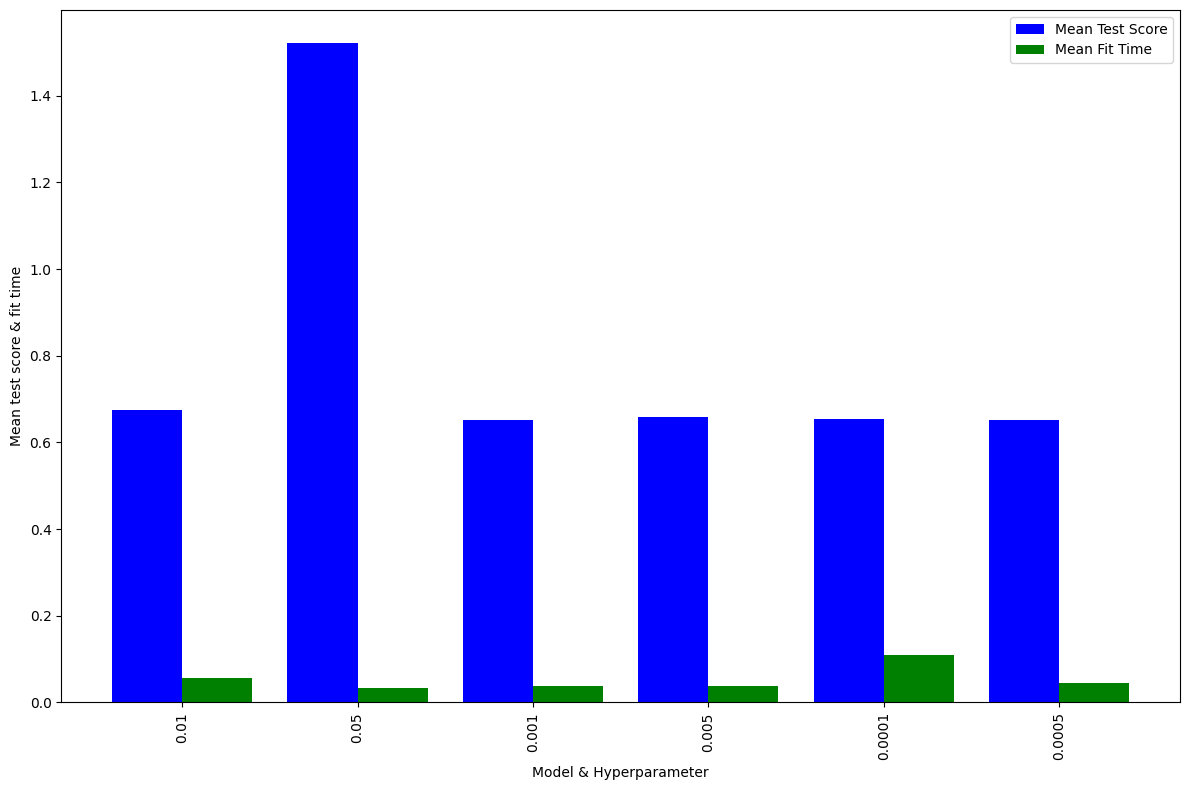

In [20]:
sgd_model = SGDRegressor()

sgd_param_grid = {
    'eta0': [0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005],
    'learning_rate': ['constant']
}

sgd_best_param = grid_search_and_plot(sgd_model, sgd_param_grid)

<h5>Hyperparameter tuning for Stochastic Ridge Regression</h5>

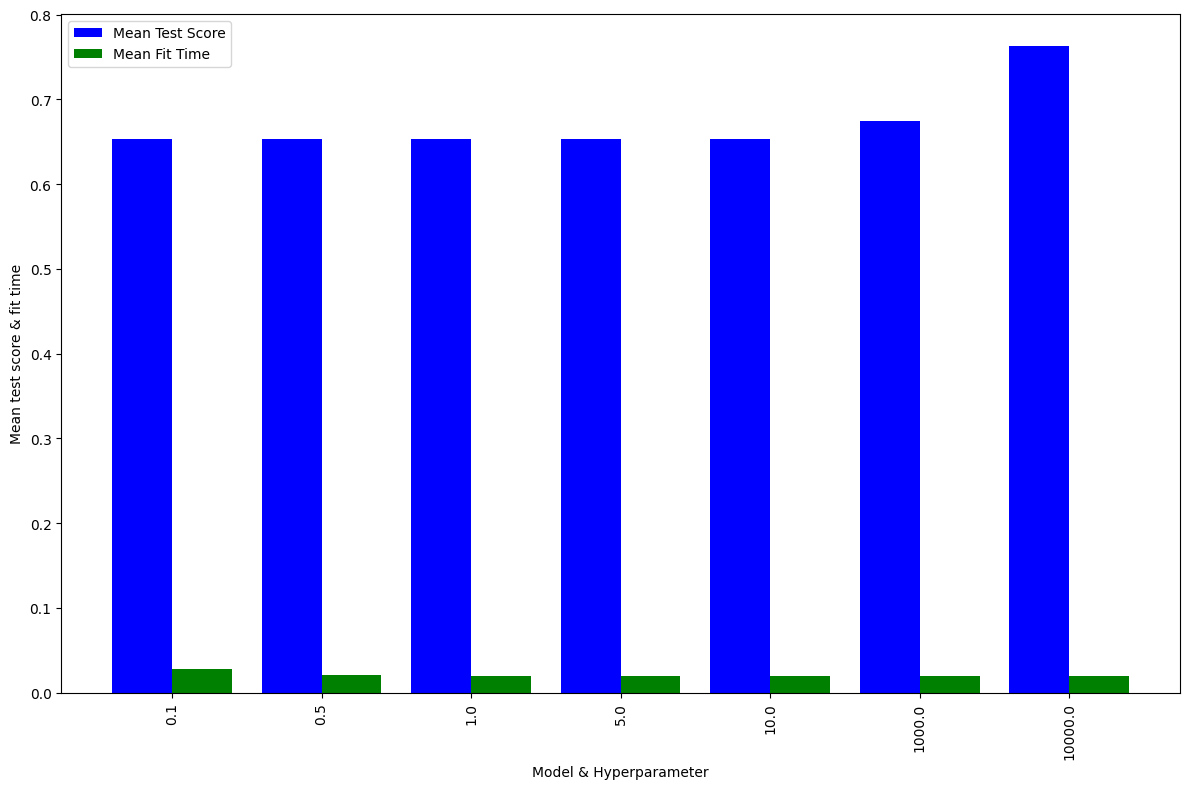

In [21]:
ridge_model = Ridge()

ridge_param_grid = {
    'alpha': [0.1, 0.5, 1, 5, 10,1000, 10000]
}

ridge_best_param = grid_search_and_plot(ridge_model, ridge_param_grid)

<h5>Hyperparameter tuning for LASSO</h5>

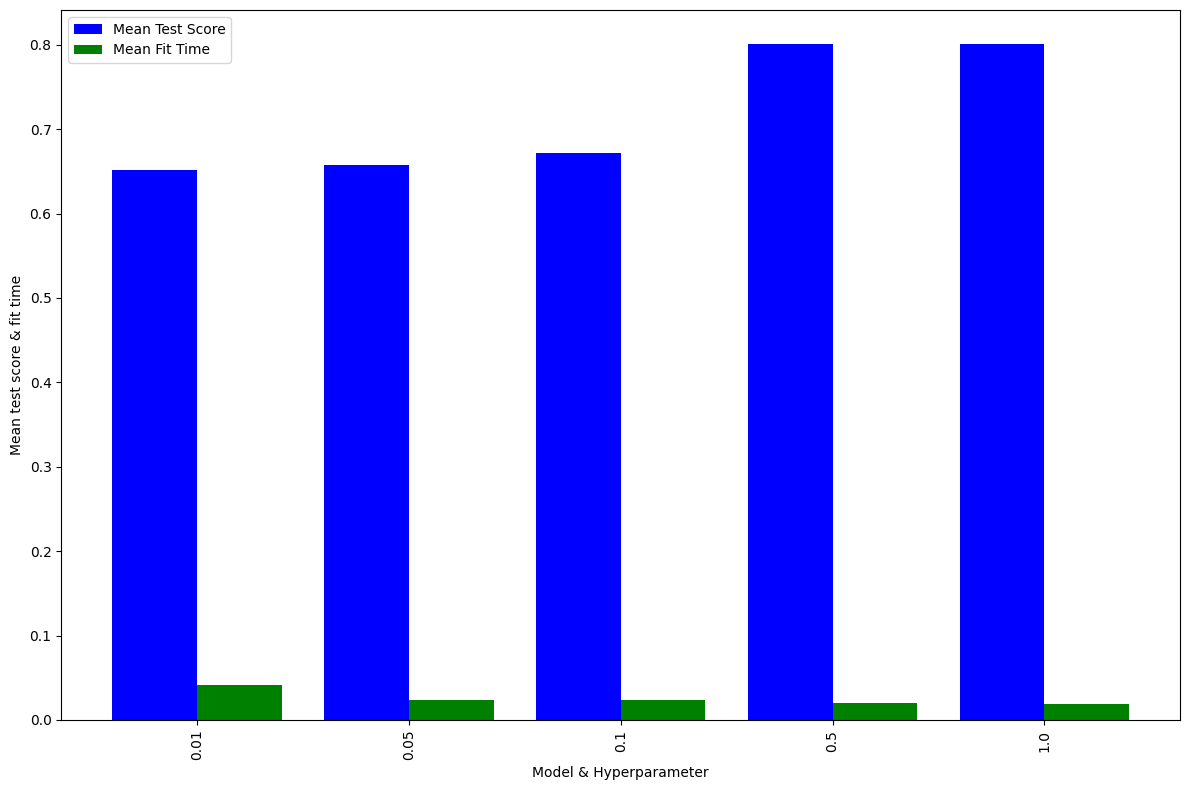

In [22]:
lasso_model = Lasso()

lasso_param_grid = {
    'alpha': [0.01, 0.05, 0.1, 0.5, 1]
}

lasso_best_param = grid_search_and_plot(lasso_model, lasso_param_grid)

<h4>Task 1.4</h4>

In [23]:
from sklearn.model_selection import cross_val_score

<p>Next, we will evaluate our model using cross_val_score, setting the scoring parameter to "neg_root_mean_squared_error" once again.</p>

In [24]:
def cross_val_evaluation(model):
    scores = cross_val_score(model, X_train, y_train, scoring = 'neg_root_mean_squared_error')
    rmse_scores = -scores
    return rmse_scores

<h4>Stochastic Gradient Descent Evaluation</h4>

In [25]:
sgd_model = SGDRegressor(learning_rate = 'constant', eta0 = sgd_best_param)
sgd_rmse_scores = cross_val_evaluation(sgd_model)

<h4>Ridge Regression Evaluation</h4>

In [26]:
ridge_model = Ridge(alpha = ridge_best_param)
ridge_rmse_scores = cross_val_evaluation(ridge_model)

<h4>Lasso Evaluation</h4>

In [27]:
lasso_model = Lasso(alpha = lasso_best_param)
lasso_rmse_scores = cross_val_evaluation(lasso_model)

<h4>Boxplot comparison</h4>

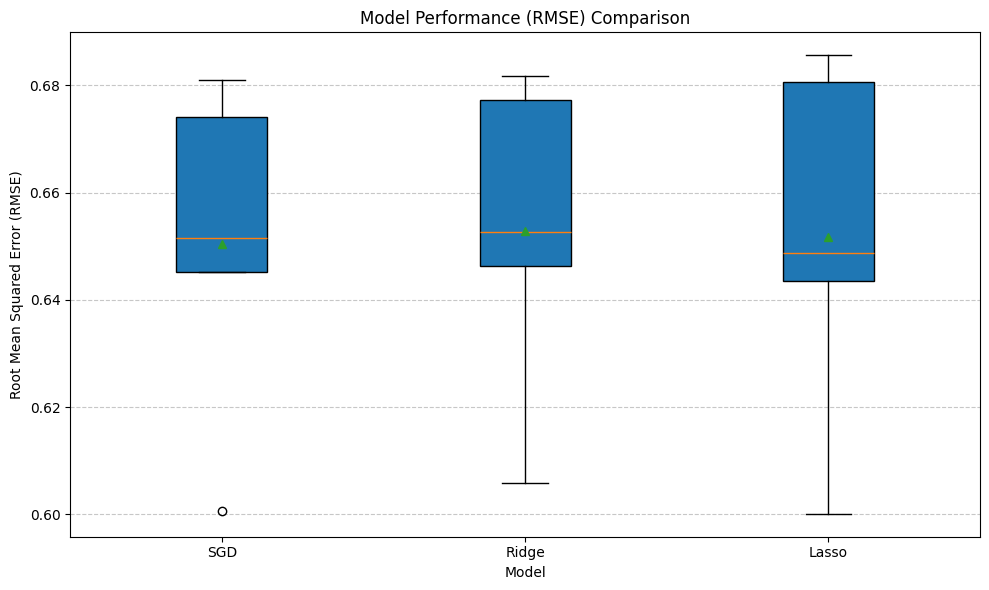

In [28]:
all_scores = [sgd_rmse_scores, ridge_rmse_scores, lasso_rmse_scores]
model_names = ['SGD', 'Ridge', 'Lasso']

plt.figure(figsize = (10,6))
plt.boxplot(all_scores, tick_labels = model_names, patch_artist = True, showmeans = True)
plt.title('Model Performance (RMSE) Comparison')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xlabel('Model')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

<p>From the boxplot, we observe that the models with optimal parameters perform similarly. However, the boxplot does not reveal the convergence/training time, which is also an important factor to consider.</p>

<h2>Question 2 - Polynomial Regression </h2>
<p>In this task, you are required to use dataset D1. So far, we have only looked at 1st-degree
polynomials (i.e., linear). In this task, you have to use higher degrees of polynomial features
for your data: degrees 1, 2, 7, 10, 16, and 100. [Hint: use sklearn.preprocessing to generate
polynomial features].
</p>
<h3>Tasks:</h3>
<ol>
    <li>Task A: Prediction with High Degree Polynomials</li>
    <ol  Type="a">
        <li>For each newly created dataset, learn LinearRegression.</li>
        <li> Plot prediction curves for each reprocessed data and (y vs x). Describe the phenomena you observe for different prediction curves.</li>
    </ol>
    <li>Task B: Effect of Regularization</li>
    <ol  Type="a">
        <li>Fix the degree of the polynomial to 10.</li>
        <li>Pick four values of λ (regularization constant) and learn Ridge Regression [Hint: use
Ridge and select λ values far apart, e.g., 0, 10−6
, 10−2
, 1].
</li>
        <li>Plot prediction curves for each reprocessed data and (y vs x). Describe the phenomena observed for different prediction curves.</li>
    </ol>
</ol>

In [29]:
x = D_1['x'].values.reshape(-1, 1)
y = D_1['y'].values

sorted_indices = np.argsort(x.flatten())  
x_sorted = x[sorted_indices] 
y_sorted = y[sorted_indices]  

<h4>Task A</h4>

In [30]:
from sklearn.preprocessing import PolynomialFeatures

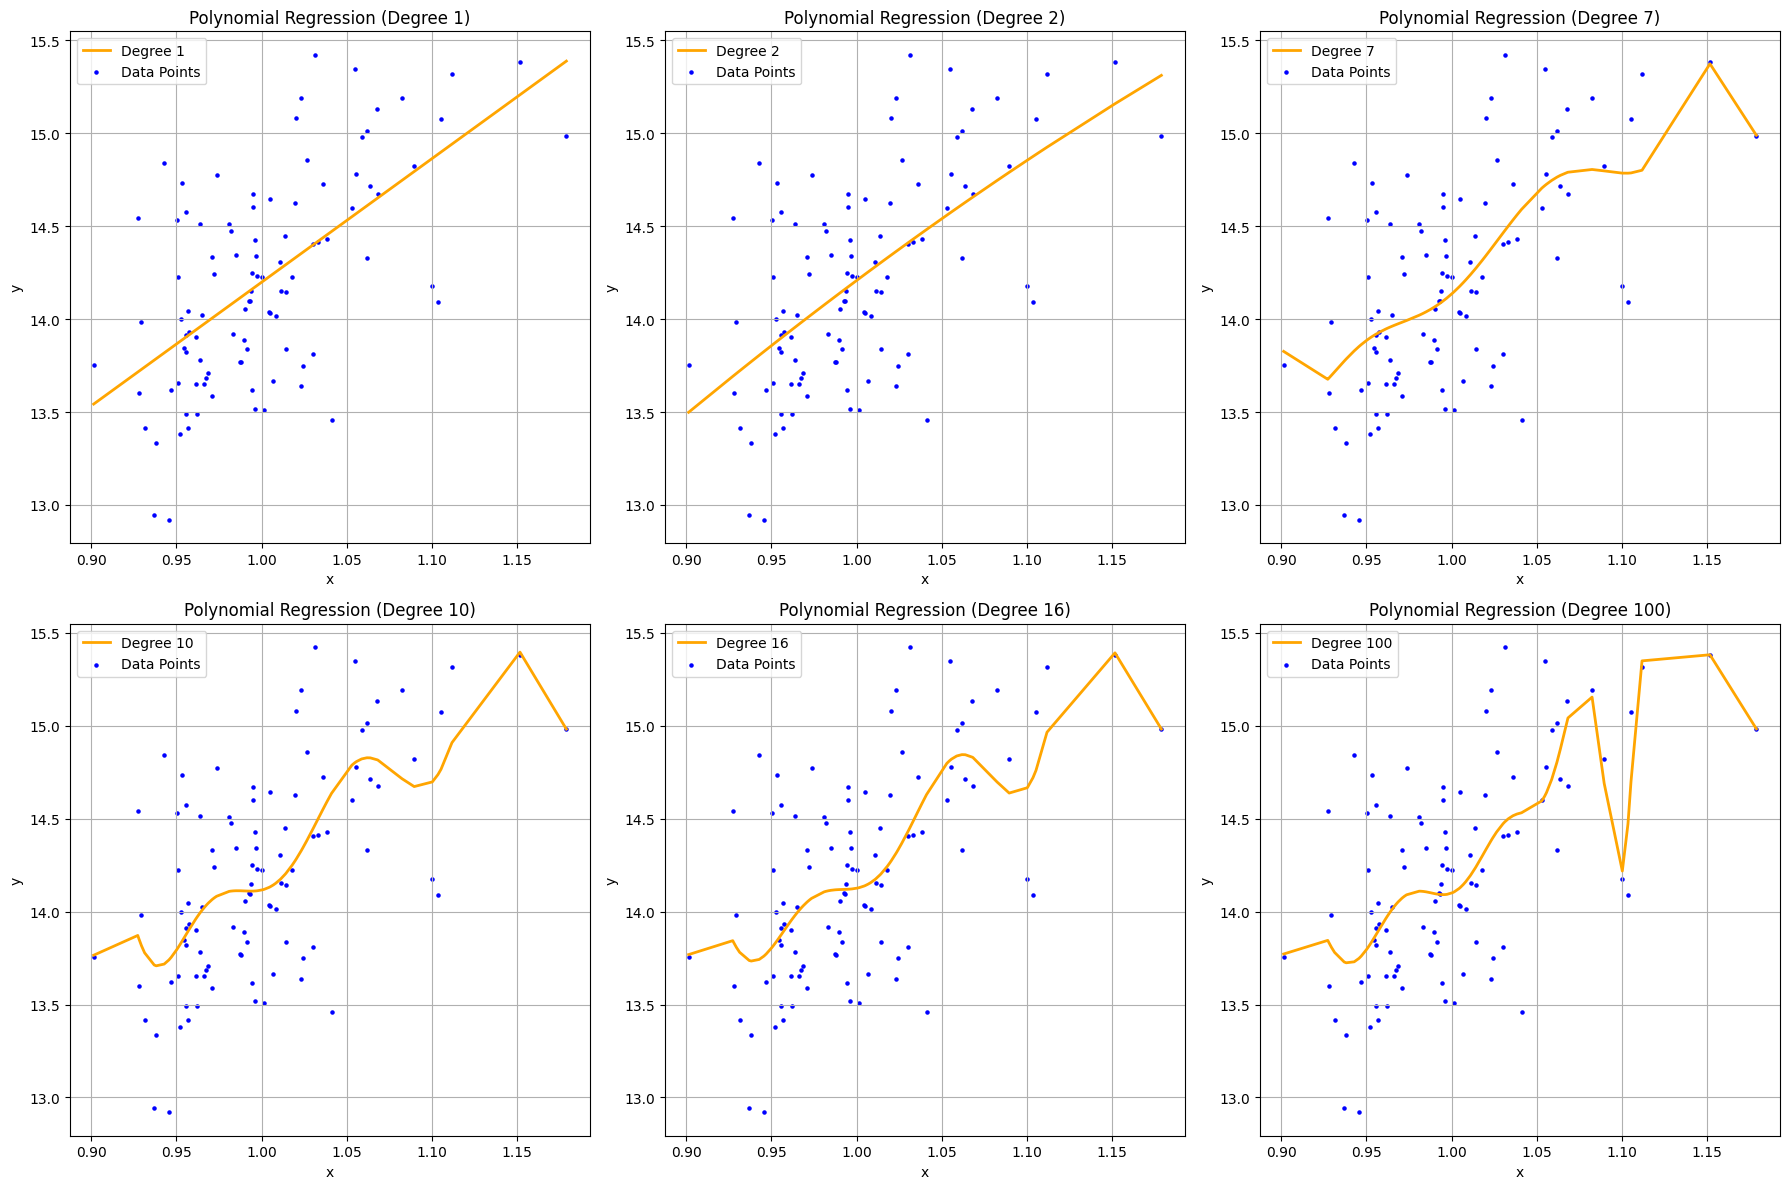

In [31]:
degrees = [1, 2, 7, 10, 16, 100]

fig, axes = plt.subplots(2, 3, figsize = (18, 12))
axes = axes.flatten()

for i, degree in enumerate(degrees):
    
    poly = PolynomialFeatures(degree=degree)
    X_poly_sorted = poly.fit_transform(x_sorted)
    
    model = LinearRegression()
    model.fit(X_poly_sorted, y_sorted)
    
    y_pred = model.predict(X_poly_sorted)
    
    axes[i].plot(x_sorted, y_pred, label = f'Degree {degree}', color = 'orange', linewidth = 2)
    axes[i].scatter(x_sorted, y_sorted, color = 'blue', s = 5, label = 'Data Points')
    axes[i].set_title(f'Polynomial Regression (Degree {degree})')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].legend()
    axes[i].grid()

plt.tight_layout()
plt.show()

<p>As the degree increases, the model increasingly fits the training data more closely, as shown by the graphs. However, this improved fit comes with the risk of overfitting. Higher-degree models may exhibit better performance on the training data, but their performance on new or unseen data tends to degrade, as they begin to capture noise rather than the true underlying patterns.</p>

<h4>Task B</h4>

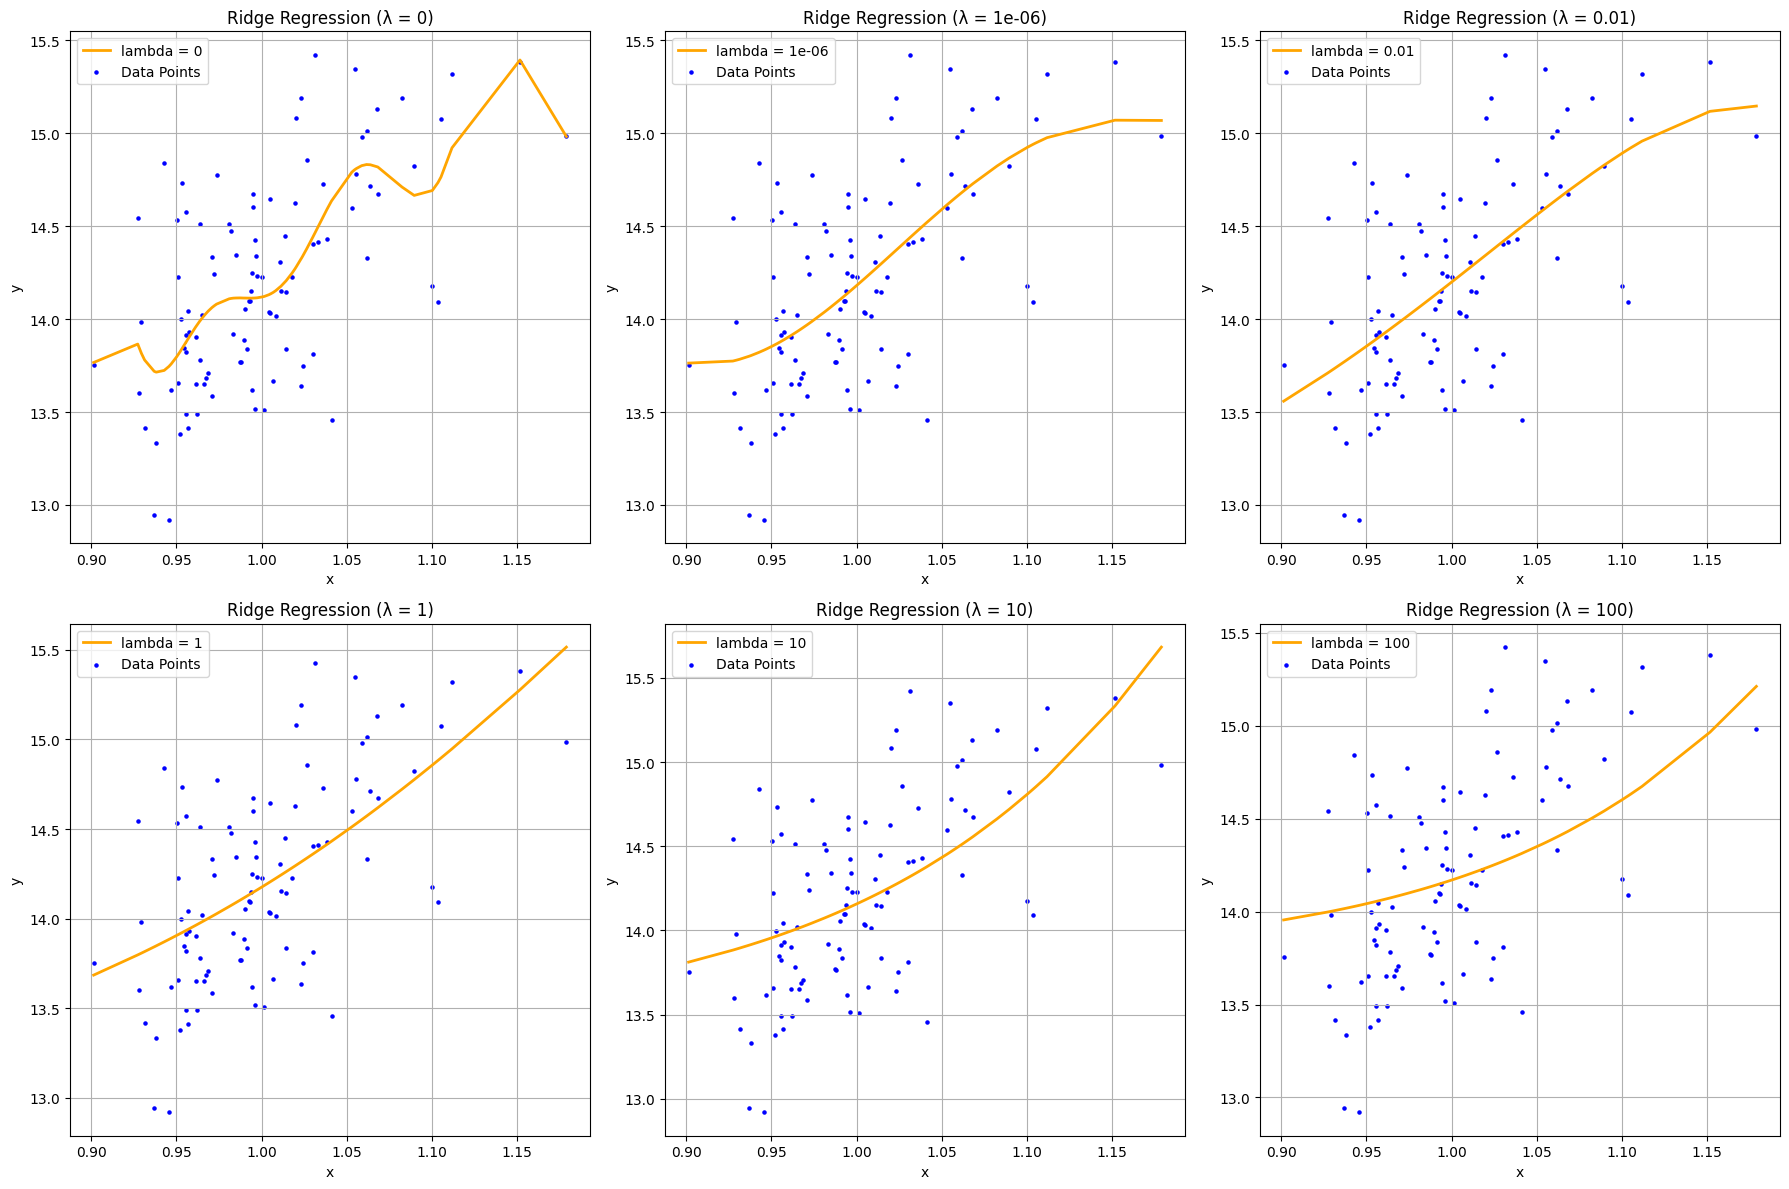

In [32]:
lambda_values = [0, 10**-6, 10**-2, 1, 10, 100]

fig, axes = plt.subplots(2, 3, figsize = (18, 12))
axes = axes.flatten()

for i, lambda_val in enumerate(lambda_values):
    
    poly = PolynomialFeatures(degree=10)
    X_poly_sorted = poly.fit_transform(x_sorted)
    
    model = Ridge(alpha=lambda_val)
    model.fit(X_poly_sorted, y_sorted)
    
    y_pred = model.predict(X_poly_sorted)
    
    axes[i].plot(x_sorted, y_pred, label = f'lambda = {lambda_val}', color = 'orange', linewidth = 2)
    axes[i].scatter(x_sorted, y_sorted, color = 'blue', s = 5, label = 'Data Points')
    axes[i].set_title(f'Ridge Regression (λ = {lambda_val})')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].legend()
    axes[i].grid()

plt.tight_layout()
plt.show()

<p>After applying regularization, the graphs show a noticeable reduction in the model's fit to the training data, as the complexity is penalized. The model no longer overfits the noise in the data and presents a more balanced performance between the training and test sets. The training error increases slightly, but the model's ability to generalize improves, as seen by the reduced overfitting.</p>